In [2]:
from IPython.display import Image, display, HTML

# Foundations of Natural Language Processing

Primary problems that NLP aims to solve is the set of methods for making human language accessible to computers, the analysis of a text, generation of context-appropriate text, and in the modern context, accomplishing these tasks by processing fast sums of data and statistical methods. Natural Languages have loose rules of syntax that are ambiguous and not well-defined. Computer Languages are non-natural languages that have well defined syntax and rules of constructions. We first review some prob/stats concepts that are useful for natural language modeling.

## Hidden Variables

Recall that for conditional probabilities $P(X|Y) = P(X,Y) / P(X)$. A conditional probability query doesn't always reference all variables in the full distribution. Suppose there are random variables $X, Y, H$. Then the conditional probability formula changes. 

$$P(Y = y|E = e) = \alpha \sum_h P(Y = y, E = e, H = h)$$ 

Where $\alpha$ is the normalization constant that ensures the probability will sum to zero, and is equal to total probability $P(E = e)$. 

$$\alpha = \frac{1}{\sum_y P(Y = y, E = e)} = \frac{1}{\sum_y \sum_h P(Y = y, E = e, H = h)}$$

For example, suppose I want to figure out $P(Y=1 | E = positive)$, but there's some confounding variable $H$. 

1. Calculate the numerator $\sum_h P(Y = 1, E = positive, H = h)$; we are interested in all worlds where $Y = 1, E = positive$. 
2. Now to normalize, we need to divide by all cases where $E = positive$, and we do that by dividing by $\sum_y \sum_h P(Y = y, E = positive, H = h)$

If we have multiple hidden variables $H_1, H_2, ... H_n$, we simply do the following. 

$$P(Y = y | E = e) = \alpha \sum_{x_1 \in H_1} \sum_{x_2 \in H_2} \dots \sum_{x_n \in H_n} P(Y = y, E = e, H_1 = x_1, \dots, H_n = x_n)$$
$$\alpha = \frac{1}{P(E = e)} = \frac{1}{\sum_y \sum_{x_1 \in H_1} \sum_{x_2 \in H_2} \dots \sum_{x_n \in H_n} P(Y = y, E = e, H_1 = x_1, \dots, H_n = x_n)}$$

## Bayes Rule and Multiple Evidence Variables 

For most real world applications, when trying to compute a probability $P(cause | e_1, e_2, \dots e_n)$, we assume the various effects are independent of one another. Recall that $P(A,B) = P(B|A)P(A)$. Similarly, we have that $P(c, e_1, \dots, e_n) = P(c)P(e_1 | c, e_2, \dots e_n)P(e_2 | c, e_1, \dots e_n) \dots P(e_n | c, e_2, \dots e_{n-1})$. However, under the Naive Bayes asssumption, we assume all effects $e_i$ are conditionally independent, so our probability equation reduces to

$$P(c, e_1 \dots e_n) = P(c) P(e_1 | c) P(e_2 | c) \dots P(e_n | c)$$

For example, in a language modeling setting, suppose we wish to figure out (unobservable) if the sentiment of a document is positive, by observing the words $w_1, \dots w_n$ present in them. Based on our naive bayes simplification, we can claim 

$$P(+, w_1, \dots, w_n) = P(+) \prod_{i=1}^n P(w_i | +)$$

### Bayesian Networks 

A bayesian network is a useful tool for visualizing and working with complex conditional dependencies. A bayesian network is essentially a directed acyclic graph structure (DAG) wher a node $v_0$ maps to node $v_1$ if $v_1$ is conditionally dependent on $v_0$. Using the bayesian network, we can derive the full joint probability distribution as 

$$P(X_1 \dots X_n) = \prod_{i=1}^N P(X_i | \hspace{5px} parents(X_i))$$

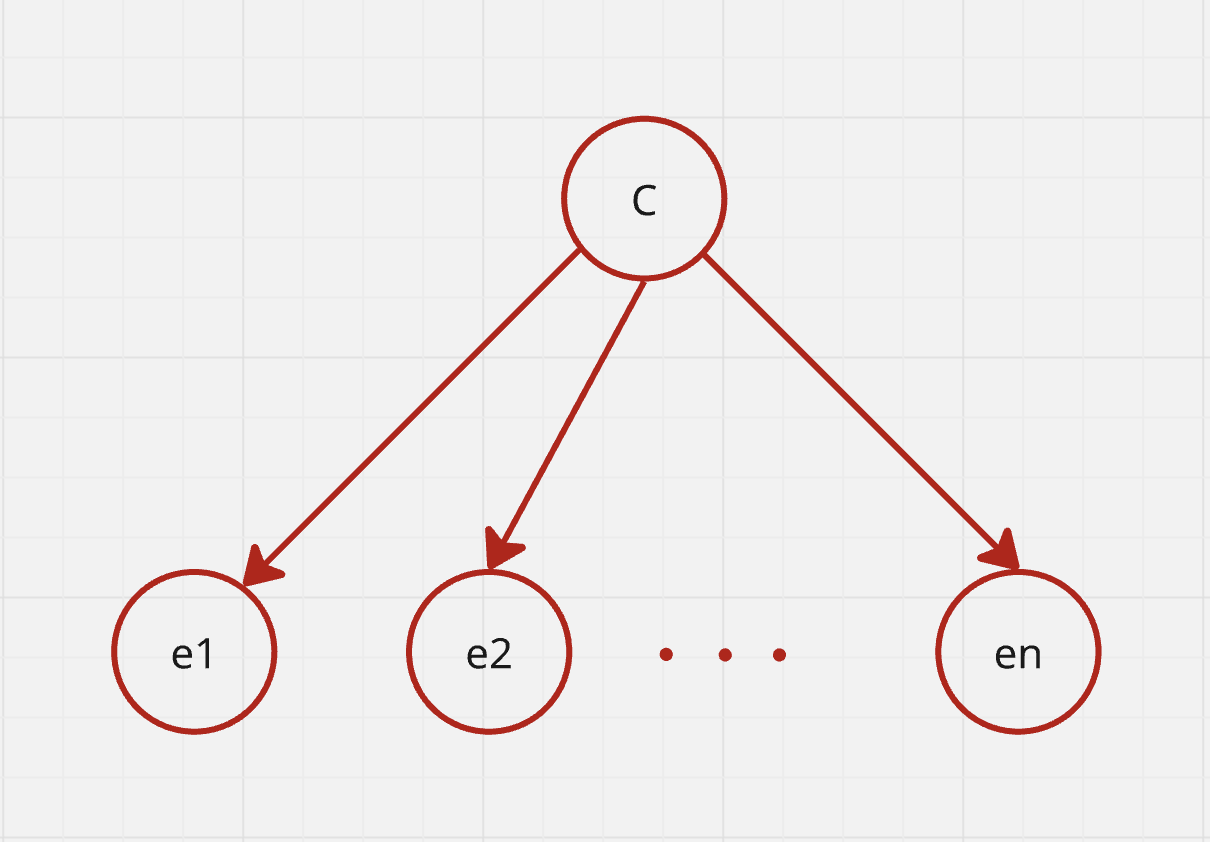

In [4]:
display(Image(filename="bayesNet.png"))

## Learning and Neural Networks Overview 

Superviesed learning is the problem of learning a function $f$ that maps given inputs to given outputs. 

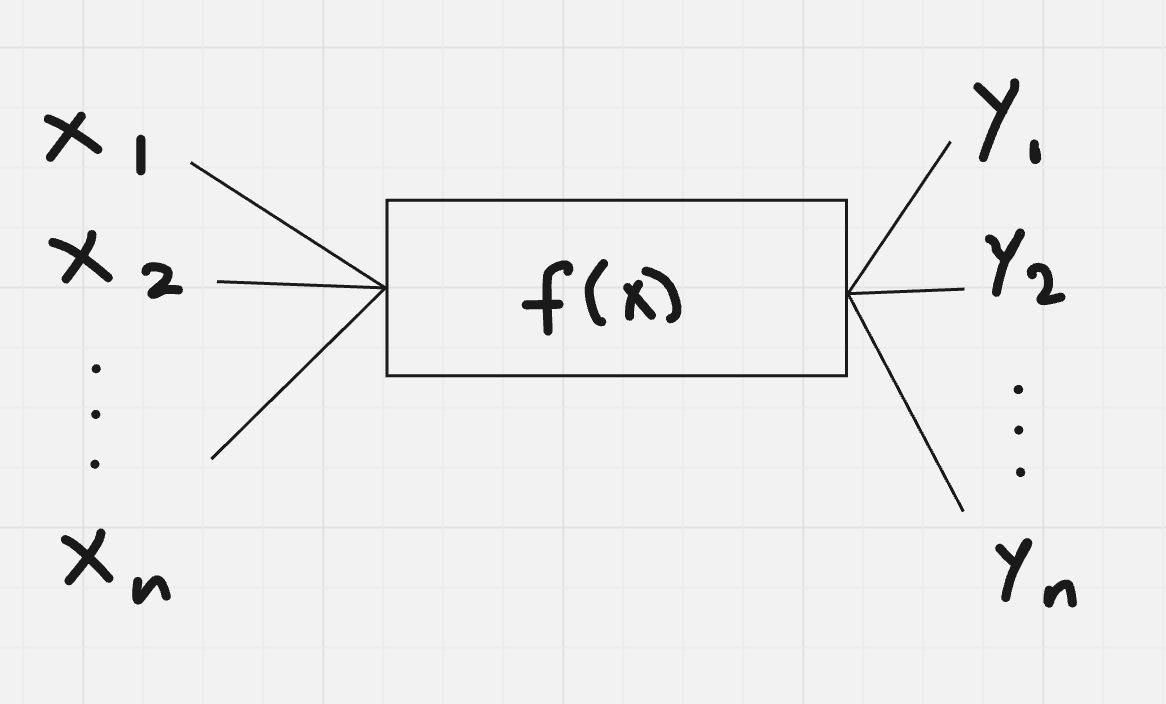

In [5]:
display(Image(filename="supervised.png"))

### Neural Networks 

Models a supervised learning task with conected bigraphs and edges with weights/feature importances and nodes representing inputs, outputs, and intermediate computaions based on activation functions. In the network below, the inputs will be passed from layer to layer and produce some $\hat y$ which will then result in some weight adjustment through numerical algorithms intended to reduce the differences between the true value $y$ and the computed $\hat y$. 

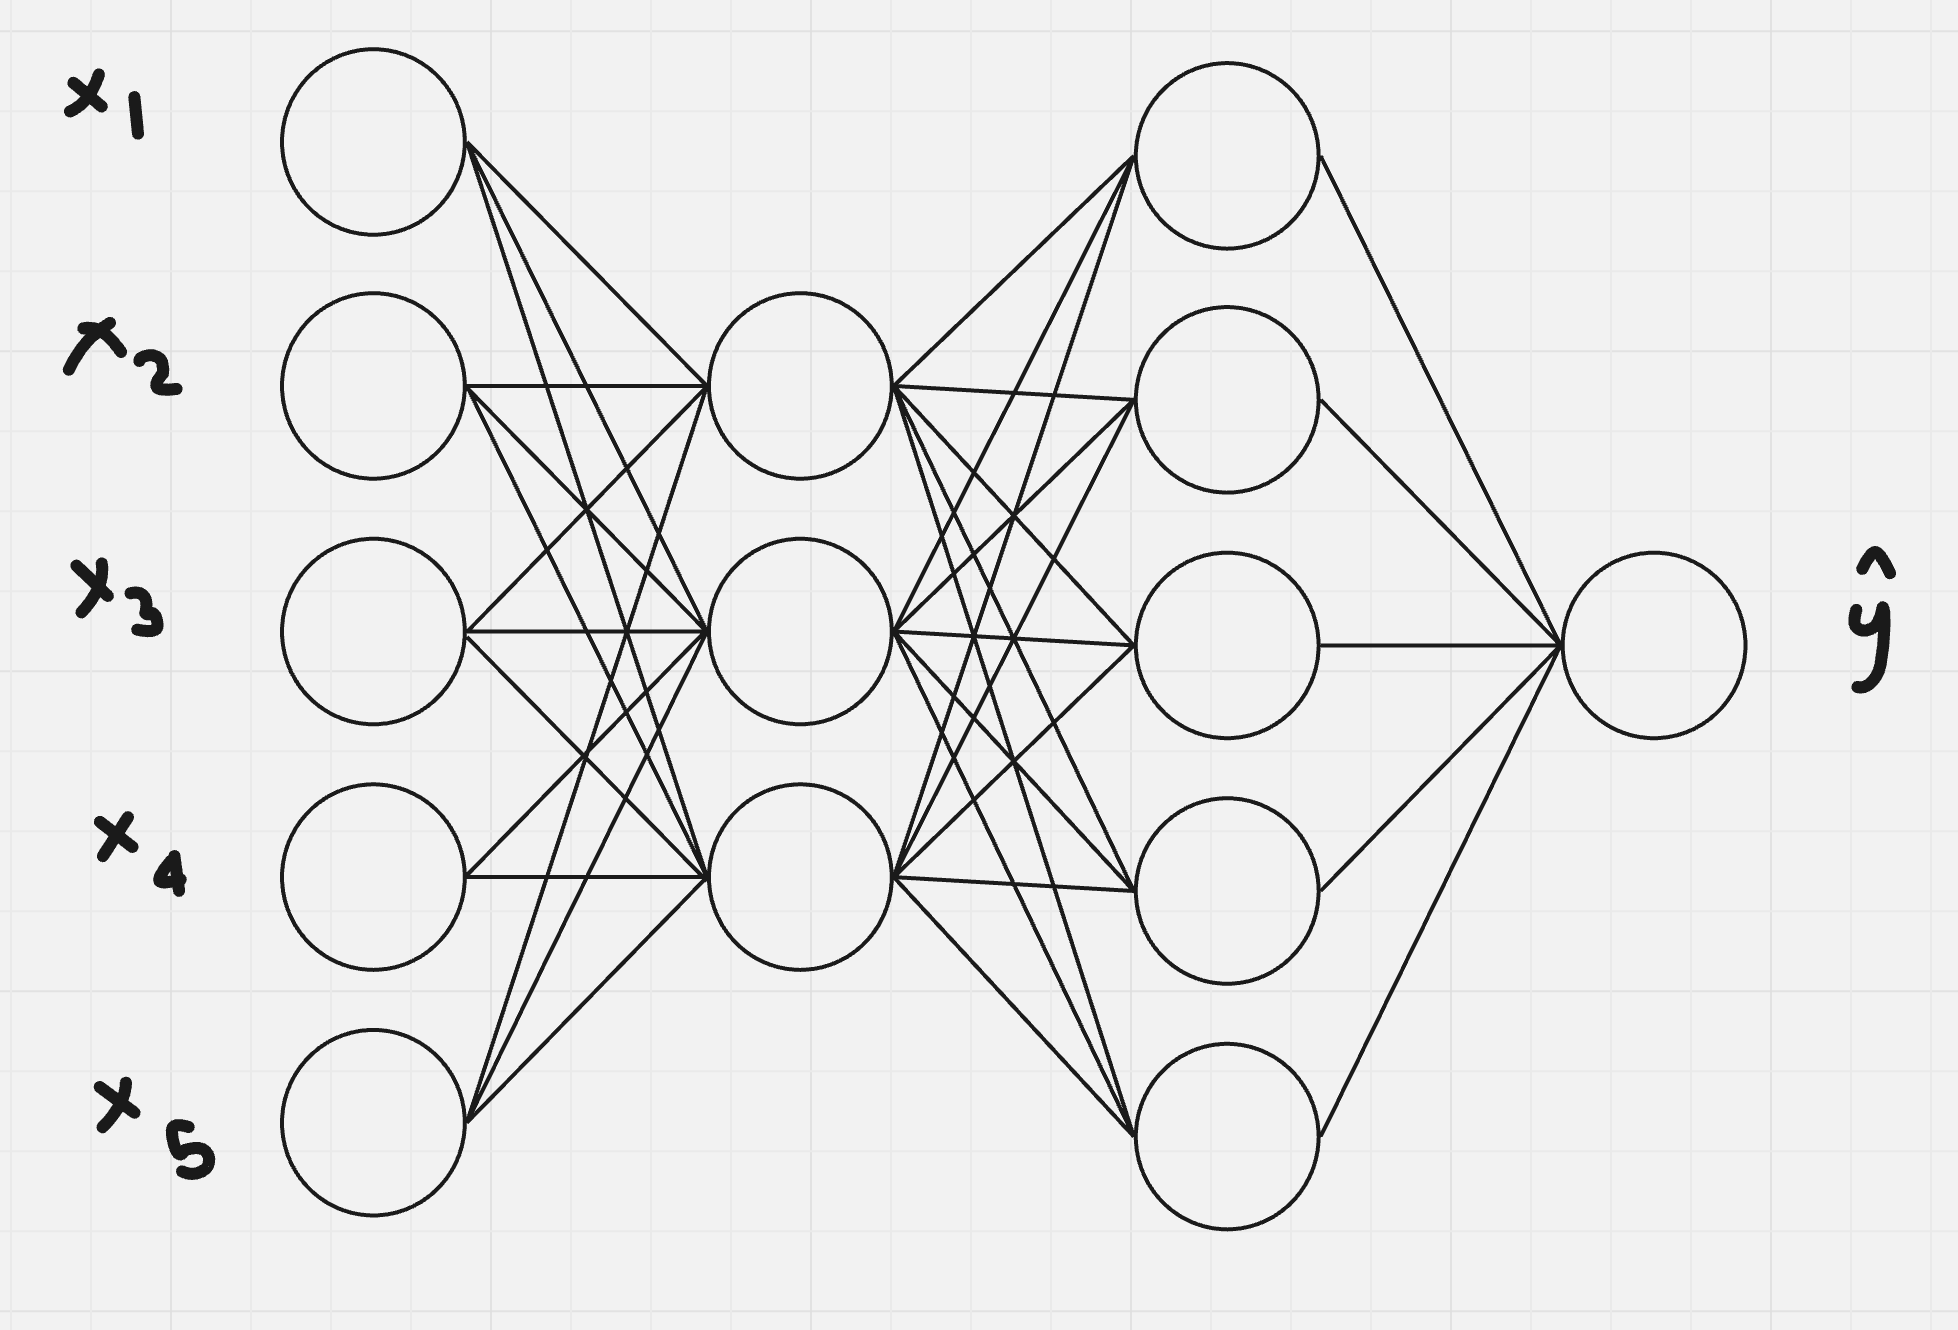

In [6]:
display(Image(filename="nn.png"))

Gradient descent is the process by which we quantify how incorrect the output of the neural network computation is, then update weights to minimize this loss. Suppose some loss function $l(w_1, \dots, w_n)$ quantifies how incorrect $\hat y_i$ is. We compute the gradient of this loss function to determine which direction the loss function decreases the most quickly, and take a step in that direction. We continue this process until convergence. This solves the optmization process of computing the combination of weights that gives us the minimal loss for our model. 

$$\nabla L = \frac{ \partial l } { \partial w } = \frac{ \partial (\frac{1}{2} (y - \hat y))^2 } { \partial w } = \frac{ \partial (\frac{1}{2} (y - \sigma(w_i^\text{T}x_i)))^2 } { \partial w }$$

We might update our weights something like $w_1 = w_0 - \eta \nabla L$. Computing gradients can be an expensive operation but modern GPUs parallelize the process by computing parital derivatives for different weights in parallel. See below for a simplified PyTorch implementation of the above neural network with intermediate sigmoid activation functions. 

In [7]:
## sample pytorch implementation 

import torch.nn as nn

class SampleTorchNN(nn.Module):
    
    def __init__(self):
        self.linear1 = nn.Linear(5,3)
        self.sig2 = nn.Sigmoid()
        self.linear3 = nn.Linear(3,5)
        self.sig4 = nn.Sigmoid()
        self.linear5 = nn.Linear(5,1)
        self.sig6 = nn.Sigmoid()
    
    def forward(self, x):
        inter1 = self.linear1(x)
        inter2 = self.sig2(inter1)
        inter3 = self.linear3(inter2)
        inter4 = self.sig4(inter3)
        inter5 = self.linear4(inter4)
        y_hat = self.sig6(inter5)
        return y_hat

x = [1, 2, 3, 4, 5]
y = [1, 3, 5, 7, 9]

model = SampleTorchNN()

for i in range(len(x)):
    a = x[i]
    b = y[i]
    y_hat = model(a)
    loss = loss(y_hat, b)
    loss.backward()

AttributeError: cannot assign module before Module.__init__() call